In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())
print(df.info())
print(df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

# The Hierarchy (3 Points): In the Matplotlib architecture, what is the relationship between a Figure and an Axes? Explain in your own words.


first thing: we need to know what's figure and axes in matplotlib

figure: A container that holds the entire plot, including all axes, titles, labels, and other elements.

axes: The area within the figure where the actual data is plotted. A figure can contain multiple axes (subplots).

the relationshipbetween figure and axes is that a figure is the overall container for the plot, while axes are the specific areas within that container where data is visualized.

# What are two key advantages of using Seaborn over plain Matplotlib for statistical data visualization? Provide a brief example for each.

the two key advantages of using Seaborn over plain Matplotlib for statistical data visualization are:

 1. Enhanced Aesthetics and Simplicity: Seaborn comes with built-in themes and color palettes that make it easy to create visually 


 appealing plots with minimal code. For example, creating a histogram with Seaborn is as simple as:


  sns.histplot(data=df, x='math score', kde=True)

  plt.show()

  In contrast, achieving similar aesthetics in Matplotlib would require more customization.

  2 .Statistical Plotting Functions: Seaborn provides high-level functions specifically designed for statistical visualizations, such as box plots, violin plots, and pair plots. For instance, creating a box plot to visualize the distribution of math scores by gender can be done easily with Seaborn.

# What is the difference between the "stateful" (pyplot-style) and "stateless" (object-oriented) interfaces in Matplotlib? Write a simple code snippet to create the same line plot using both interfaces.
# the difference between the "stateful" (pyplot-style) and "stateless" (object-oriented) interfaces in Matplotlib is that the stateful interface relies on a global state to manage figures and axes, while the stateless interface requires explicit creation and management of figure and axes objects. The stateful interface is simpler for quick plots, while the stateless interface provides more control and flexibility for complex visualizations.

# In Seaborn, what is the purpose of the hue parameter? Name two different plot types where it is commonly and effectively used.

# the purpose of the hue parameter in Seaborn is to add a third dimension to the data visualization by using different colors to represent different categories within a dataset. This allows for better differentiation and comparison of data points based on a categorical variable.
# Two different plot types where the hue parameter is commonly and effectively used are: scatter plots and bar plots.

# Section B: Code Correction & Explanation

a) Fix the code so it produces the correct bar plot.

b) Add a title and label the x & y axes appropriately.

c) Explain why the original code failed

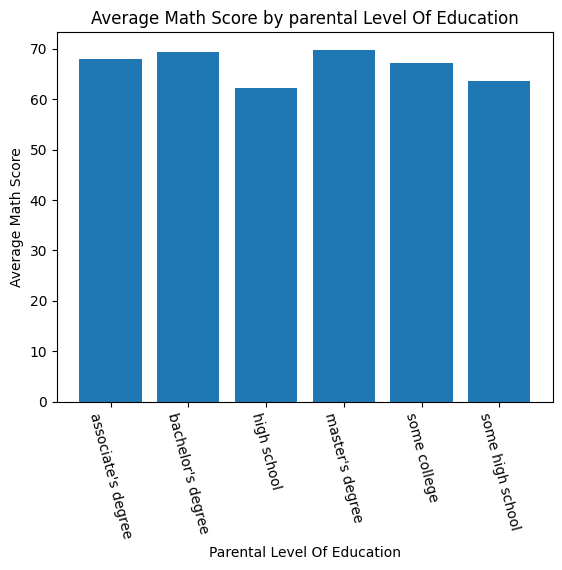

In [6]:
avg_math = df.groupby('parental level of education')['math score'].mean()
plt.bar(avg_math.index, avg_math.values)
plt.title('Average Math Score by parental Level Of Education')
plt.xlabel('Parental Level Of Education')
plt.ylabel('Average Math Score')

plt.xticks(rotation=-75)

plt.show()

# c) Explain why the original code failed

In [7]:
# the original code failed because it was incomplete and did not include the necessary commands to create and display the bar chart. The code snippet only contained "plt." which is not sufficient to generate a plot. The complete code needed to calculate the average math scores, create the bar chart, label the axes, and finally display the plot using plt.show().

# a) Fix the code to create properly overlapping histograms. Make sure they are semi-transparent so both can be seen, and add a legend.
# b) Explain the issue with the original code

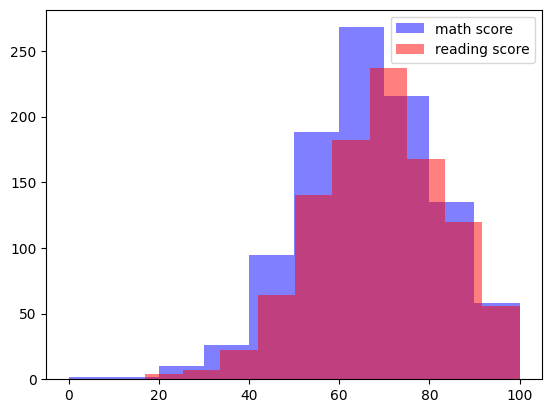

In [8]:
plt.Figure(figsize=(8,5))
plt.hist(df['math score'], alpha=0.5, label='math score', color='blue')
plt.hist(df['reading score'], alpha=0.5, label='reading score', color='red')
plt.legend()
plt.show()

# Section C: Practical Application & Plotting (65 Points):
# Now it's your turn to create plots from scratch! Use a combination  of Matplotlib and Seaborn.


# the Foundation: Box Plot (10 Points)
# Create a single figure containing three side-by-side box plots. Each box plot should show the distribution of math score, reading score, and writing score. Give the figure a title and ensure the x-axis is properly labeled.


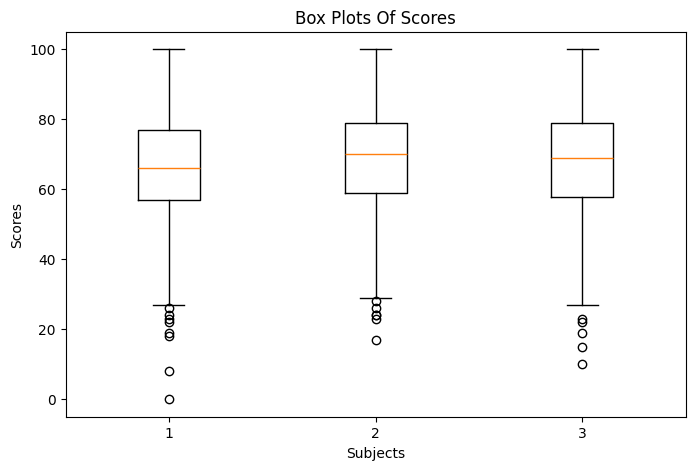

In [9]:
plt.figure(figsize=(8,5))
plt.boxplot(df[['math score', 'reading score', 'writing score']].values)
plt.title('Box Plots Of Scores')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.show()


# Seaborn's Power: Count Plot with Hue (15 Points)
# Use Seaborn to create a count plot that shows the number of students from each race/ethnicity group. Furthermore, use the hue parameter to break down each bar by gender. Add a title and make sure the legend is visible.

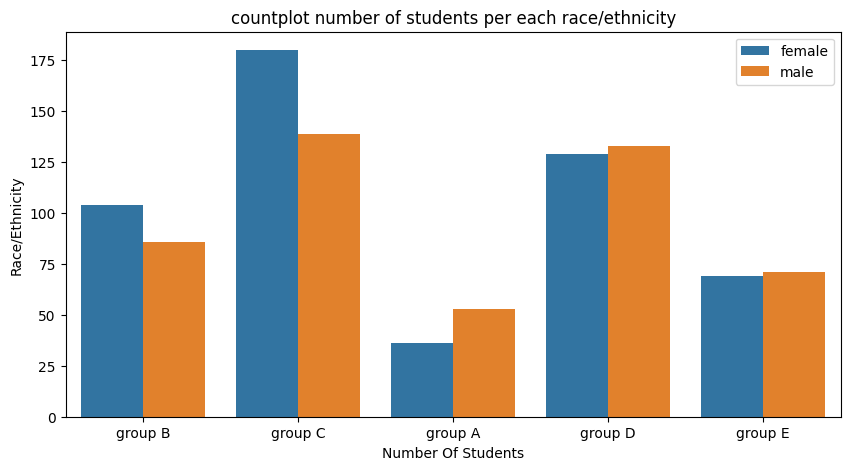

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='race/ethnicity', hue='gender')
plt.title('countplot number of students per each race/ethnicity')
plt.xlabel('Number Of Students')
plt.ylabel('Race/Ethnicity')
plt.legend()
plt.show()

# Relationship Investigation: Scatter Plot (15 Points)
# Is there a relationship between math score and writing score?

Create a scatter plot to investigate.

Color the points by test preparation course to see if completing the course has any visible effect.

Add a trendline (regression line) for each category of the test preparation course.

Add appropriate titles and labels.

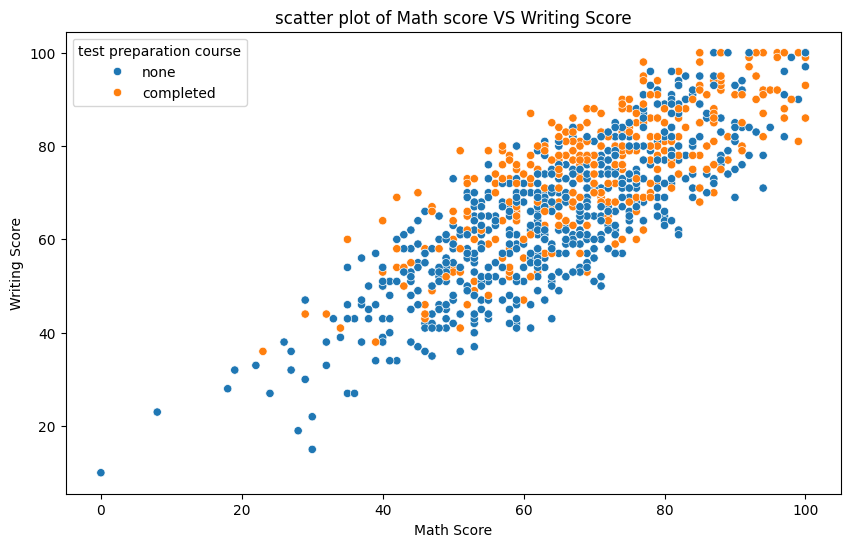

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='math score', y='writing score', hue='test preparation course')
plt.title('scatter plot of Math score VS Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

# Advanced Composition: Subplots (25 Points)
# This is your final challenge! Create a 2x2 grid of subplots (a figure with 4 distinct plots).

Top-Left: A Kernel Density Plot (KDE) for math score, shaded under the curve.

Top-Right: A violin plot showing the distribution of reading score for each lunch type. Use hue to split each violin by gender.

Bottom-Left: A horizontal bar plot showing the average writing score for each parental level of education. Sort the bars from highest to lowest score.

Bottom-Right: A heatmap showing the correlation matrix between the three numerical score columns (math score, reading score, writing score). Annotate the cells with the correlation values.

Requirements:

The entire figure should have a super title: "Comprehensive Student Performance Analysis".

Each subplot must have its own title.

Ensure the layout is tidy and not cramped.

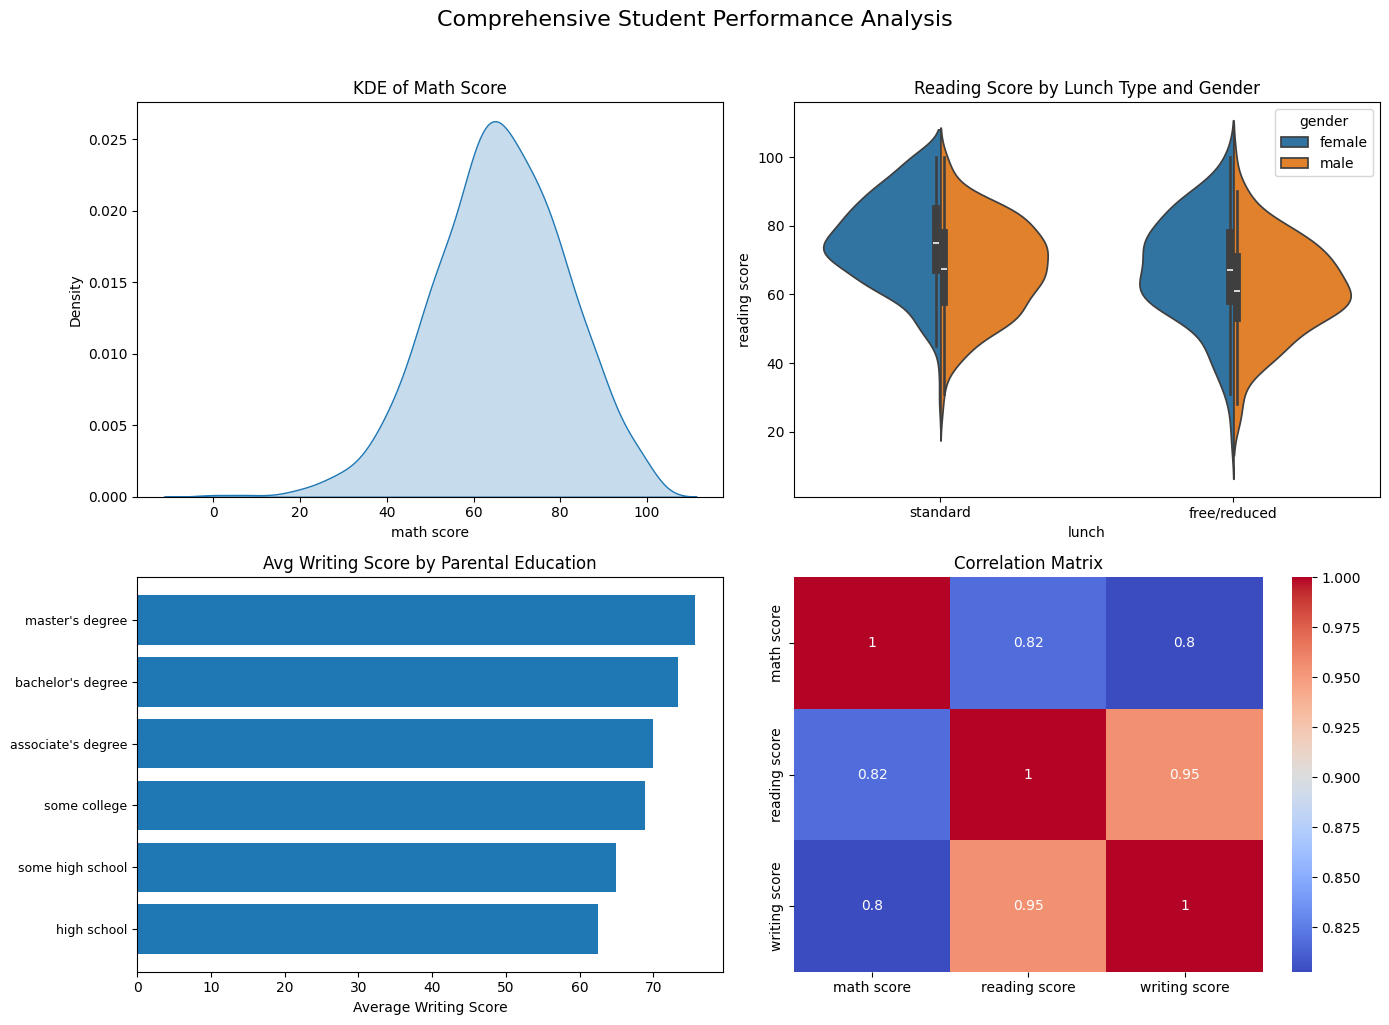

In [12]:
# 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Set the big title
fig.suptitle("Comprehensive Student Performance Analysis", fontsize=16, y=1.02)

# --- Top-Left: KDE plot for math score ---
sns.kdeplot(
    data=df,
    x='math score',
    fill=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("KDE of Math Score")

# --- Top-Right: Violin plot of reading score by lunch, hue by gender ---
sns.violinplot(
    data=df,
    x='lunch',
    y='reading score',
    hue='gender',
    split=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Reading Score by Lunch Type and Gender")

# --- Bottom-Left: Horizontal bar plot, avg writing score by parental education ---
avg_write = df.groupby('parental level of education')['writing score'].mean().sort_values(ascending=True)

axes[1, 0].barh(avg_write.index, avg_write.values)
axes[1, 0].set_title("Avg Writing Score by Parental Education")
axes[1, 0].set_xlabel("Average Writing Score")

# Make x-axis labels readable
axes[1, 0].tick_params(axis='y', labelsize=9)

# --- Bottom-Right: Correlation heatmap ---
corr = df[['math score', 'reading score', 'writing score']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    ax=axes[1, 1]
)
axes[1, 1].set_title("Correlation Matrix")

# Make layout clean
plt.tight_layout()
plt.show()

# take your favorite plot from the questions above (Q7-Q10) and customize it extensively.

# Change the color palette to something more visually appealing (e.g., sns.color_palette("husl") or a custom list of colors).

# Modify the figure style (e.g., sns.set_style("whitegrid")).

# Adjust the font sizes for titles and labels.

# Add a descriptive annotation (text box) to the plot highlighting one key insight.


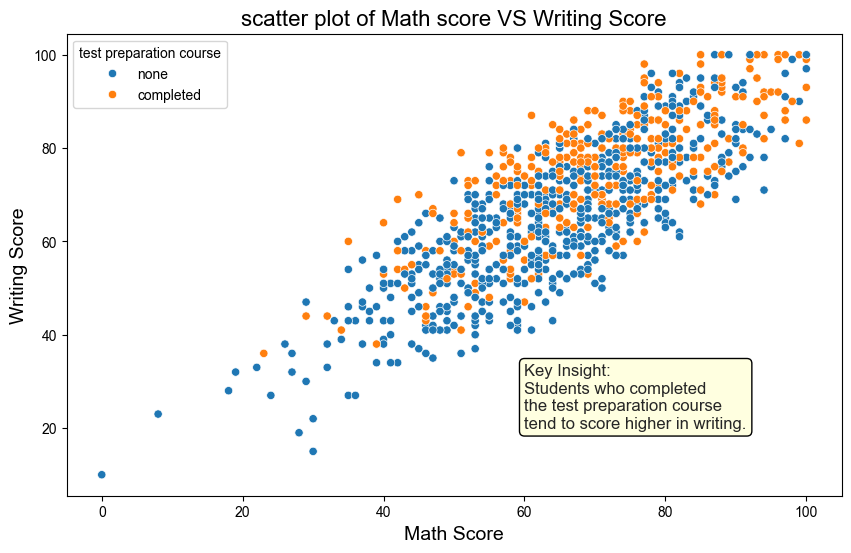

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='math score', y='writing score', hue='test preparation course')
sns.set_style("whitegrid")
sns.color_palette("husl")
plt.title('scatter plot of Math score VS Writing Score', fontsize=16)
plt.xlabel('Math Score', fontsize=14)
plt.ylabel('Writing Score', fontsize=14)
plt.annotate(
    'Key Insight:\nStudents who completed\nthe test preparation course\ntend to score higher in writing.',
    xy=(90, 60),
    xytext=(60, 20),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightyellow')
)
plt.show()